# EDA - KC Housing Data

## Objective
In this Jupyter Notebook we'll be diving deeper into the KC housing dataset by performing some EDA. This includes:
- Spotting Outliers
- Discovering patterns and trends in the data
- Correlation(statistical) relationship between variables
- Dealing with Multicollinearity between independent variables

## Import necessary Libraries and load Data

In [1]:
# Let's start by importing nessesary libraries
import pandas as pd
import numpy as np
# File containing functions 
import mydef 
# For visualizations
import seaborn as sns  

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load out cleaned data
kc_cleaned = pd.read_csv('Data/kc_cleaned.csv')
kc_cleaned.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Pandas loaded the data with an extra index column, we can go ahead and get rid of that
kc_cleaned.drop(['Unnamed: 0'], axis=1, inplace=True)
kc_cleaned.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check .info() to make sure everything looks good
kc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20864 entries, 0 to 20863
Data columns (total 20 columns):
date             20864 non-null object
price            20864 non-null float64
bedrooms         20864 non-null int64
bathrooms        20864 non-null float64
sqft_living      20864 non-null int64
sqft_lot         20864 non-null int64
floors           20864 non-null float64
waterfront       20864 non-null float64
view             20864 non-null float64
condition        20864 non-null int64
grade            20864 non-null int64
sqft_above       20864 non-null int64
sqft_basement    20864 non-null float64
yr_built         20864 non-null int64
yr_renovated     20864 non-null int64
zipcode          20864 non-null int64
lat              20864 non-null float64
long             20864 non-null float64
sqft_living15    20864 non-null int64
sqft_lot15       20864 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.2+ MB


Everything looks good but it seems we lost the **'datetime'** type while reloading the data, but that's okay cause we're going to go ahead and drop the **'date'** column along with a couple of columns that I feel won't be of much use to us from this point on.

In [5]:
# Drop 'date', 'sqft_living15', 'sqft_lot15' and verify change
kc_cleaned.drop(['date'], axis=1, inplace=True)
kc_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering
Nice! Now we will be performing some feature engineering on the 'yr_renovated' and 'sqft_basement' columns.

In [6]:
# Check column unique values and counts
kc_cleaned['yr_renovated'].value_counts()

0       20126
2014       72
2003       31
2013       31
2007       30
        ...  
1948        1
1953        1
1951        1
1946        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64

In [7]:
# Check column unique values and counts
kc_cleaned['sqft_basement'].value_counts()

0.0       12787
600.0       210
500.0       203
700.0       199
800.0       192
          ...  
225.0         1
10.0          1
2330.0        1
518.0         1
2500.0        1
Name: sqft_basement, Length: 301, dtype: int64

> Majority of the values in both columns are 0's, and this tells us that majority of the houses in this dataset have not been renovated or do not have basements. In order to optimize these columns we will be transforming them to **Categorical** columns.

In [8]:
# Apply function created in seperate notebook to create new columns
kc_cleaned['basement'] = kc_cleaned['sqft_basement'].apply(mydef.condition)
kc_cleaned['renovated'] = kc_cleaned['yr_renovated'].apply(mydef.condition)
kc_cleaned.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,...,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,1,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,...,0.0,1995,0,98003,47.3097,-122.327,2238,6819,0,0
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,...,0.0,1963,0,98198,47.4095,-122.315,1650,9711,0,0
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,...,730.0,1960,0,98146,47.5123,-122.337,1780,8113,1,0
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,...,0.0,2003,0,98038,47.3684,-122.031,2390,7570,0,0


In [9]:
# Now that we've created our new columns we can go ahead and drop the orginal columns.
kc_cleaned.drop(['yr_renovated', 'sqft_basement'], axis=1, inplace=True)
kc_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


> We can _Feature Engineer_ one more column using the 'lat' and 'long' columns. The new columns would tell us the distance(in miles) of each property from one of the most popular cities near **King County**, **Bellevue**.

In [10]:
# Create a new column that contains a tuple of 'lat' and 'long'
kc_cleaned['lat_long'] = tuple(zip(kc_cleaned.lat,kc_cleaned.long))
# View top 5 datapoints of the new column
kc_cleaned['lat_long'].head()

0    (47.5112, -122.257)
1     (47.721, -122.319)
2    (47.7379, -122.233)
3    (47.5208, -122.393)
4    (47.6168, -122.045)
Name: lat_long, dtype: object

In [11]:
# Tuple for bellevue coordinates
bellevue = tuple([47.61555, -122.20392])
type(bellevue)

tuple

In [12]:
# import library to calculate distance of each property from each city
from haversine import haversine  
# For loops to calculate each distance and put them all into a list 
bell_distances = []
for i in kc_cleaned['lat_long']:
    bell_distances.append(haversine((bellevue),(i),unit = 'mi'))
bell_distances[:5]

[7.6227860195436055,
 9.041881842429145,
 8.561144732081237,
 10.979730087958123,
 7.402273389165365]

In [13]:
# Generate new feature from list
kc_cleaned['distance_from_bellevue'] = pd.Series(bell_distances)
# Drop 'lat_long' from index
kc_cleaned.drop(['lat_long'], axis=1, inplace=True)
kc_cleaned.head().T

,0,1,2,3,4
price,221900.000000,538000.000000,180000.000000,604000.00000,510000.000000
bedrooms,3.000000,3.000000,2.000000,4.00000,3.000000
bathrooms,1.000000,2.250000,1.000000,3.00000,2.000000
sqft_living,1180.000000,2570.000000,770.000000,1960.00000,1680.000000
sqft_lot,5650.000000,7242.000000,10000.000000,5000.00000,8080.000000
floors,1.000000,2.000000,1.000000,1.00000,1.000000
waterfront,0.000000,0.000000,0.000000,0.00000,0.000000
view,0.000000,0.000000,0.000000,0.00000,0.000000
condition,3.000000,3.000000,3.000000,5.00000,3.000000
grade,7.000000,7.000000,6.000000,7.00000,8.000000


## Handling Outliers
Awesome! Now that we've selected the columns we wish to work with we can move forward. As we can see we no longer have any missing values in our data but unfortunately the dataset is far from being ready for our Regression process. Although, we no longer have missing values, we might have **Outliers** in our data. Outliers are observations(data point) that lie an abnormal distance from other values, this can cause us to misinterpret significant findings in out analysis. Plot a boxplot of all the columns to observe data point and identify outliers.

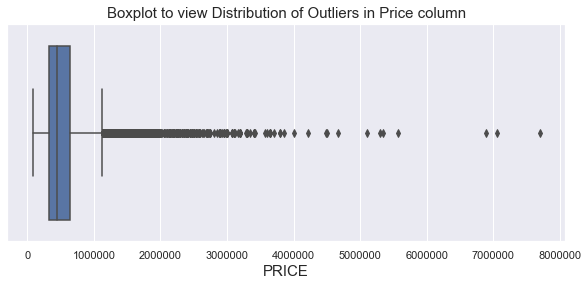

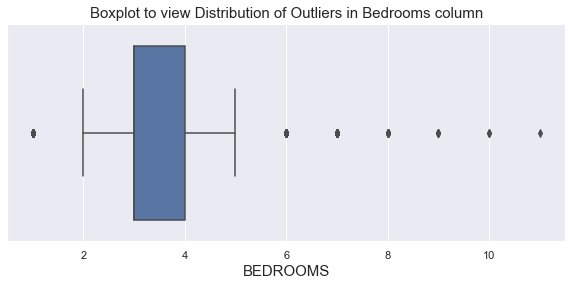

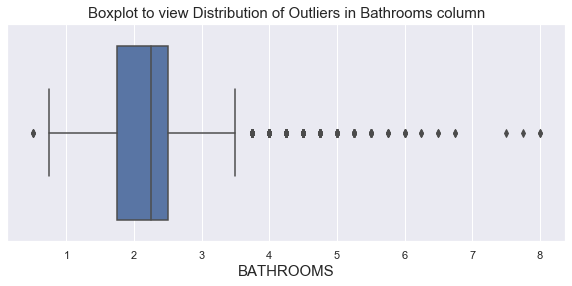

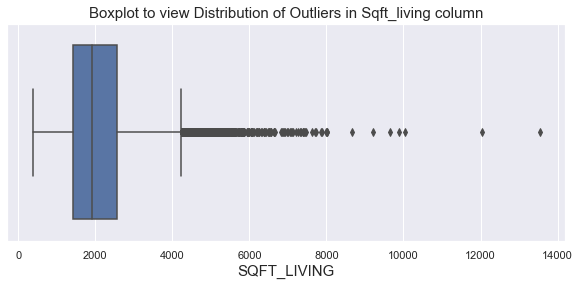

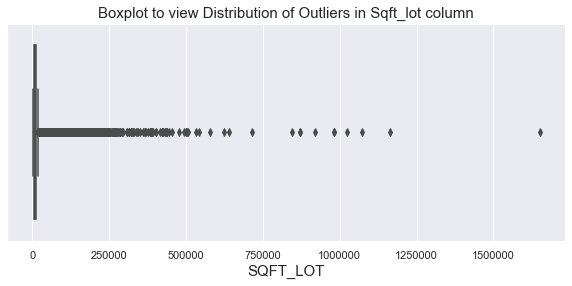

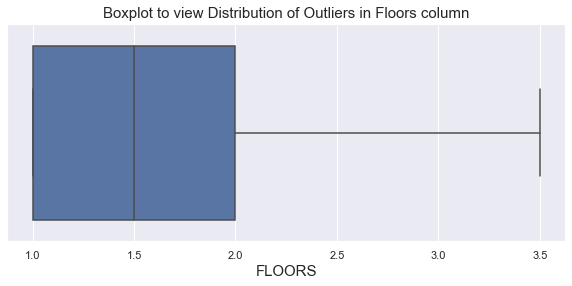

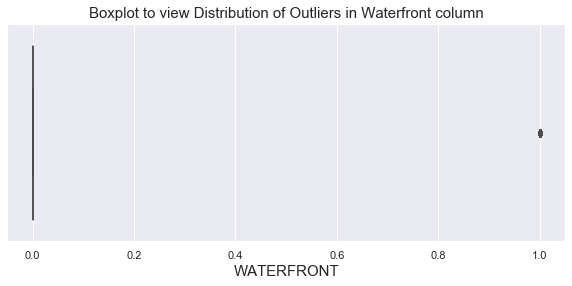

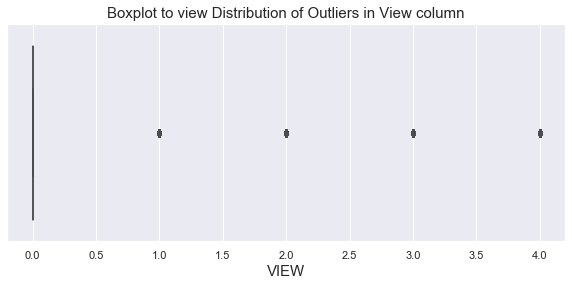

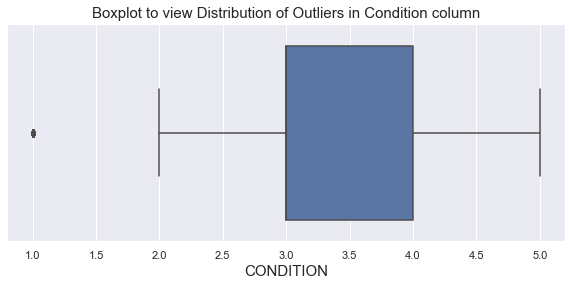

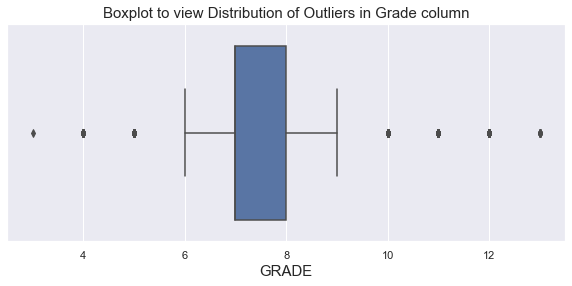

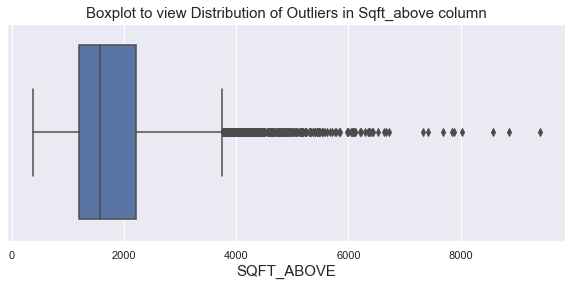

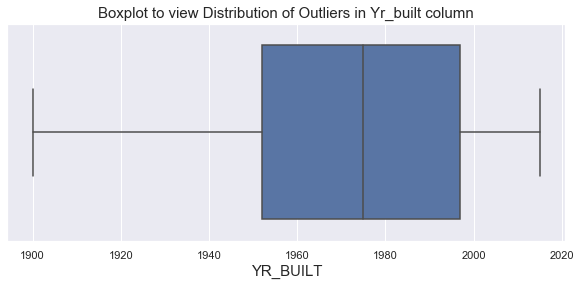

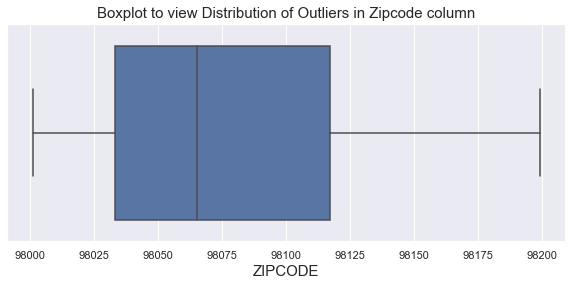

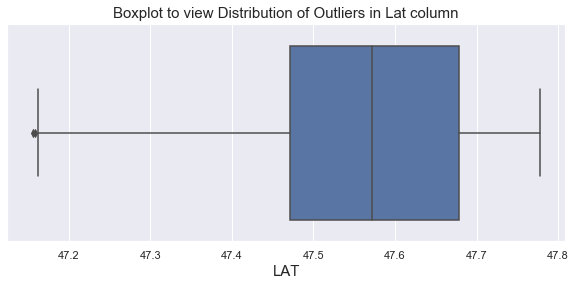

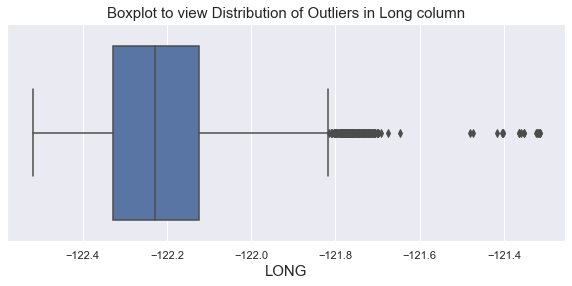

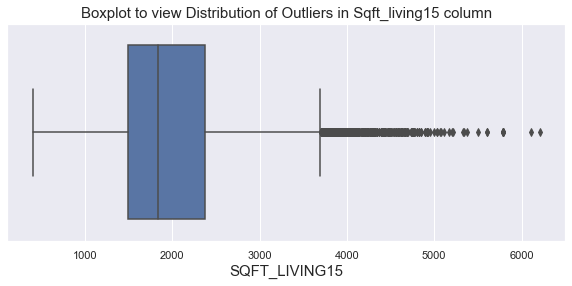

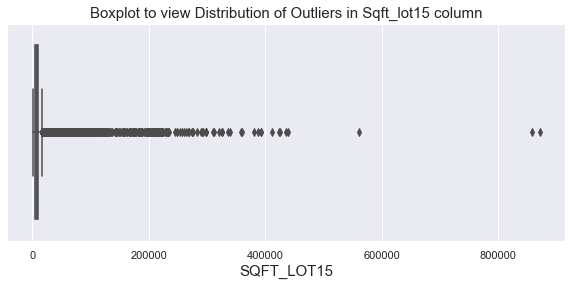

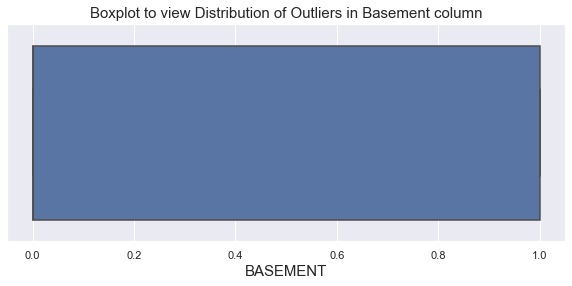

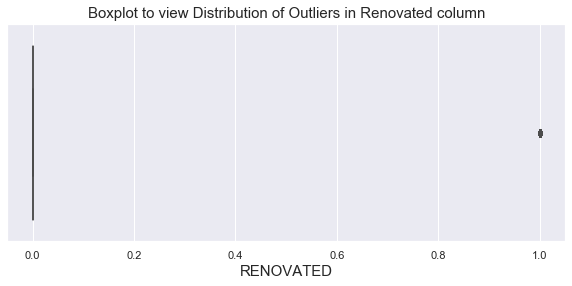

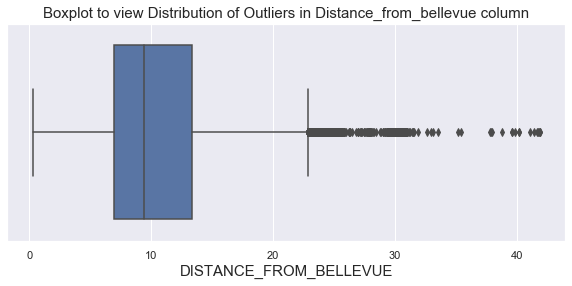

In [14]:
# For loop that create a boxplot of all columns
for column in kc_cleaned.columns:
    sns.set()
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.set(style='dark')
    sns.boxplot(x=column, data=kc_cleaned)
    plt.xlabel(f'{column.upper()}', fontsize=15)
    plt.title(f'Boxplot to view Distribution of Outliers in {column.capitalize()} column', fontsize=15)
    plt.show()

Wow that's a lot to take in, so we're going to break this down step by step. First thing that stands out are the obvious Categorical columns: 'waterfront', 'views', 'yr_built', 'basement', and 'renovated'. We'll be excluding them from the next couples of processes, along with: 'floors', 'zipcode', 'lat', and 'long', for reasons we'll dive into a little later. Now to deal with the outliers in our other columns we'll be using the **InterQuartile Range(IQR) Technique**.
> **Handling Outliers using IQR**: IQR describes the **middle (50%)** of the dataset. These are values between the **first quartile(25%)** and the **third quartile(75%)**. The first and third quartile denotes the lower and upper half of the data respectively. Any values below or beyond these points are considered **outliers**. Now that we know a little more about quartiles how do we go about getting the information we need to deal with our outliers? Keep in mind that: Q1 = 25%, IQR/Q2 = 50%, Q3 = 75%.
- Q1 = df.column.quantile(0.25)
- Q3 = df.column.quantile(0.75)
- IQR = Q3 - Q1
- Lower limit = Q1 - 1.5 * IQR
- Upper limit = Q3 + 1.5 * IQR

In [15]:
# For loop that performs the outlined calculations for each column and displays outcomes
for column in kc_cleaned:
    col = kc_cleaned[column]
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    print(f'{column.upper()}:\nQ1: {Q1}\n'
          f'Q3: {Q3}\n'
          f'IQR: {IQR}\n'
          f'Lower limit: {lower_limit}\n'
          f'Upper limit: {upper_limit}\n'
          f'Total Sum of Outliers: {(col > upper_limit).sum() + (col < lower_limit).sum()}\n')

PRICE:
Q1: 323000.0
Q3: 645000.0
IQR: 322000.0
Lower limit: -160000.0
Upper limit: 1128000.0
Total Sum of Outliers: 1130

BEDROOMS:
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower limit: 1.5
Upper limit: 5.5
Total Sum of Outliers: 505

BATHROOMS:
Q1: 1.75
Q3: 2.5
IQR: 0.75
Lower limit: 0.625
Upper limit: 3.625
Total Sum of Outliers: 542

SQFT_LIVING:
Q1: 1430.0
Q3: 2550.0
IQR: 1120.0
Lower limit: -250.0
Upper limit: 4230.0
Total Sum of Outliers: 560

SQFT_LOT:
Q1: 5040.0
Q3: 10704.0
IQR: 5664.0
Lower limit: -3456.0
Upper limit: 19200.0
Total Sum of Outliers: 2345

FLOORS:
Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower limit: -0.5
Upper limit: 3.5
Total Sum of Outliers: 0

WATERFRONT:
Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower limit: 0.0
Upper limit: 0.0
Total Sum of Outliers: 146

VIEW:
Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower limit: 0.0
Upper limit: 0.0
Total Sum of Outliers: 2048

CONDITION:
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower limit: 1.5
Upper limit: 5.5
Total Sum of Outliers: 28

GRADE:
Q1: 7.0
Q3: 8.0
IQR: 1.0
Lower limit: 5.5
Upper limit: 

Great, now that we know the *'lower'* and *'upper'* limits for each column we can drop all rows(data points) that falls outside each limit. To avoid losing so much data we'll only drop data from the columns I feel will be beneficial to the Regression Model.

In [16]:
# Remove outliers from columns not mentioned above
kc_cleaned.drop(kc_cleaned[(kc_cleaned['price'] > 1128000) | (kc_cleaned['bedrooms'] > 5.5) | 
                           (kc_cleaned['bedrooms'] < 1.5) | (kc_cleaned['bathrooms'] > 3.625) | 
                           (kc_cleaned['bathrooms'] < .625) | (kc_cleaned['sqft_living'] > 4230) |
                           (kc_cleaned['grade'] < 5.5) | (kc_cleaned['condition'] < 1.5) | 
                           (kc_cleaned['grade'] > 9.5) | (kc_cleaned['distance_from_bellevue'] > 23.45)
                          ].index, inplace=True)

In [17]:
# View shape to see how much data we have left over
kc_cleaned.shape

(17436, 20)

Now that we've dealt with our outliers let's take a closer look at the **'bathrooms'** column. 

In [18]:
# View all 'bathrooms' unique values
kc_cleaned['bathrooms'].value_counts()

2.50    4419
1.00    3293
1.75    2772
2.25    1780
2.00    1715
1.50    1299
2.75     923
3.00     526
3.50     372
3.25     300
0.75      31
1.25       6
Name: bathrooms, dtype: int64

> We can see that there are houses with bathroom sizes that end in *'.25'* and *'.75'*, It's common knowledge that most houses have a number of whole bathrooms and occasionally half bathrooms. If we want our finding to reflect the real world we need to transpose these values by either rounding them up/down.

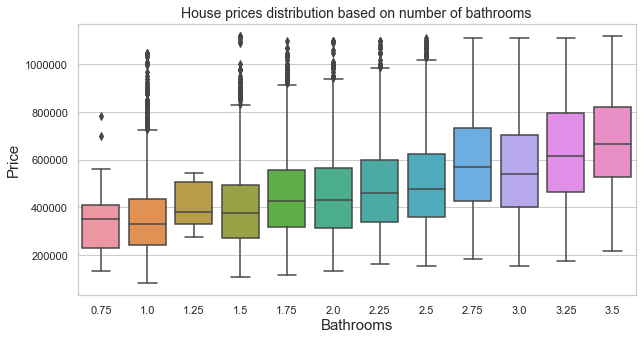

In [19]:
# Use a boxplot to look at the price distribution of each number of bathrooms 
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.boxplot(x='bathrooms', y='price', data=kc_cleaned)
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('House prices distribution based on number of bathrooms',fontsize=14)
plt.show()

In [20]:
# Get the mean of each bathroom unique value grouped by price
kc_cleaned.groupby('bathrooms')['price'].mean()

bathrooms
0.75    360293.612903
1.00    355792.680534
1.25    406575.000000
1.50    406500.738260
1.75    449508.492785
2.00    455757.570845
2.25    488126.438764
2.50    505821.903824
2.75    588353.101842
3.00    565351.939163
3.25    632412.800000
3.50    674845.376344
Name: price, dtype: float64

In [21]:
# Apply fuction that takes in values that end in .25/.75, adds .25 returns new value
kc_cleaned['bathrooms'] = kc_cleaned['bathrooms'].apply(mydef.roundup)
kc_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated,distance_from_bellevue
0,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0,7.622786
1,538000.0,3,2.5,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1,9.041882
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0,8.561145
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0,10.979730
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0,7.402273


In [22]:
# Make sure function worked properly
kc_cleaned['bathrooms'].value_counts()

2.5    6199
2.0    4487
1.0    3324
3.0    1449
1.5    1305
3.5     672
Name: bathrooms, dtype: int64

## Distribution
Great, before moving on to working on our **Regression Models** let's check that all the **independent variables** are normally distributed.

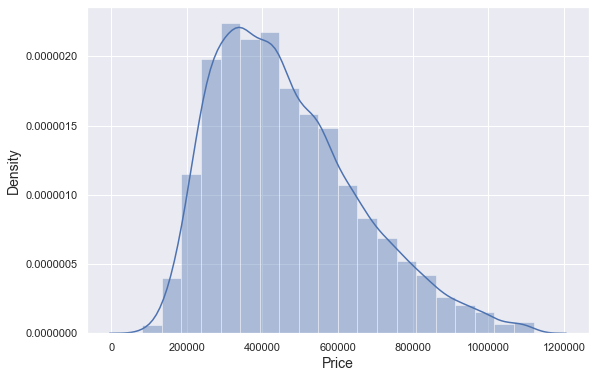

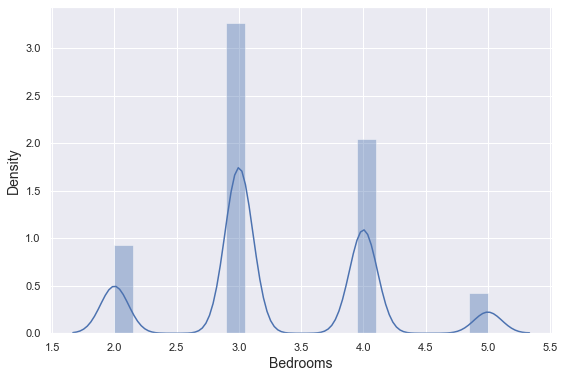

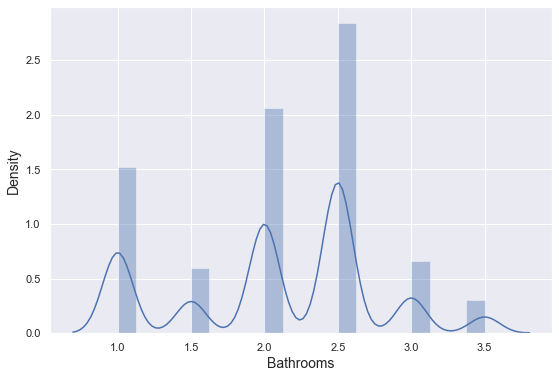

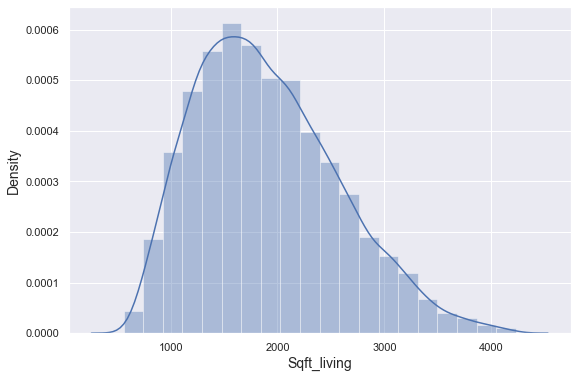

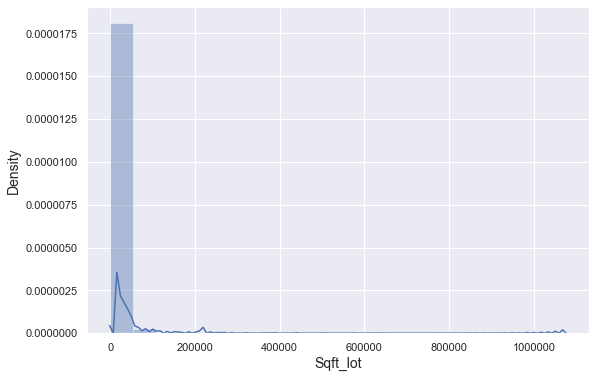

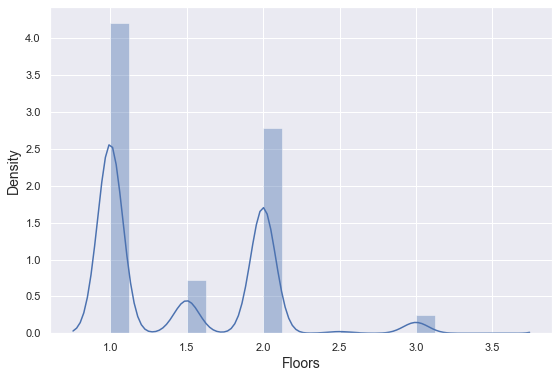

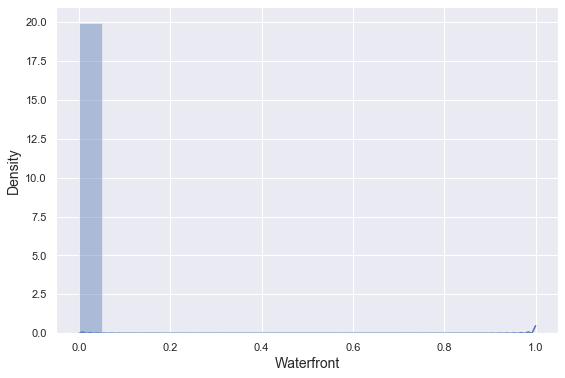

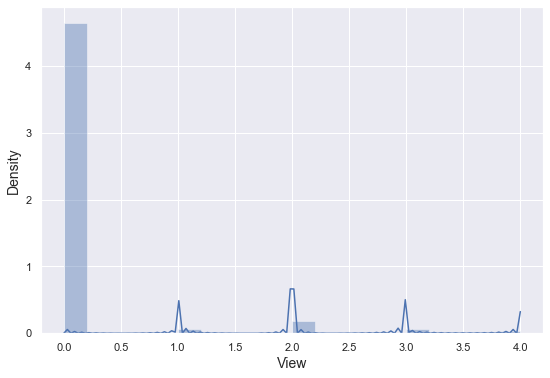

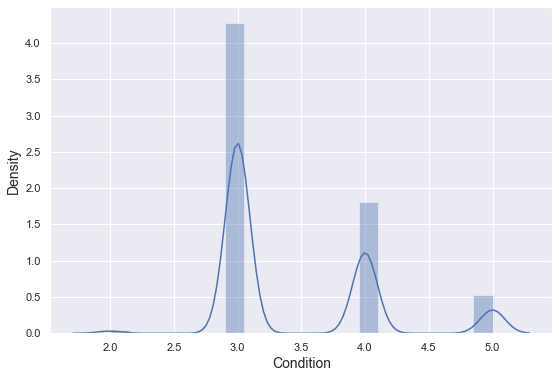

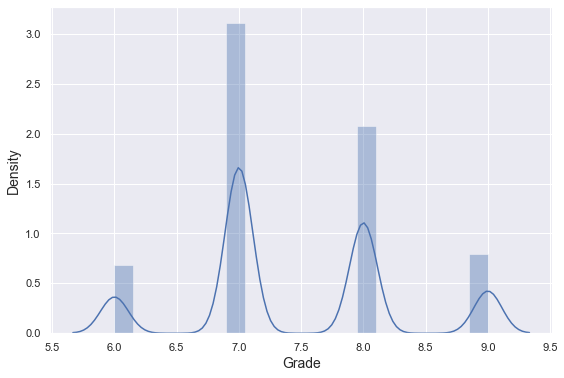

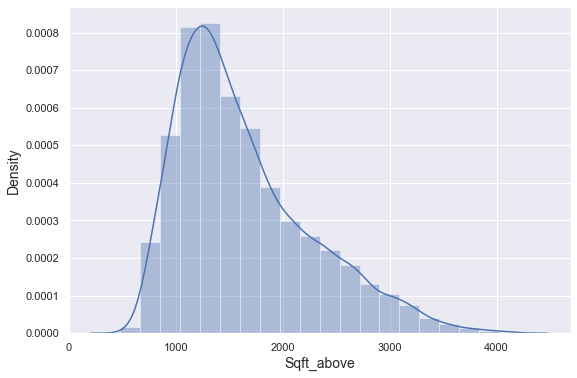

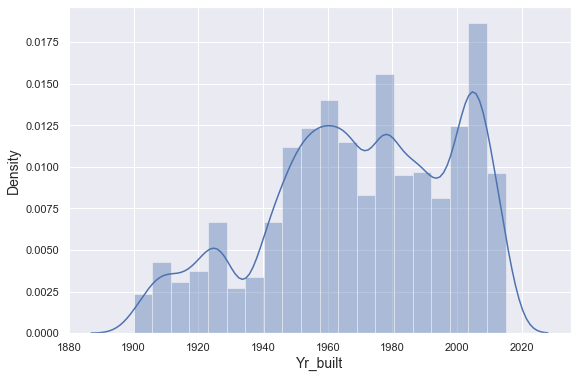

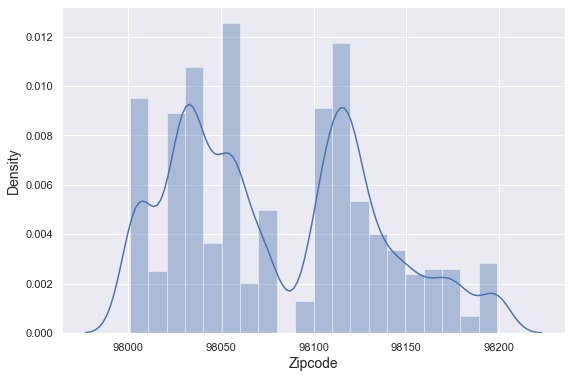

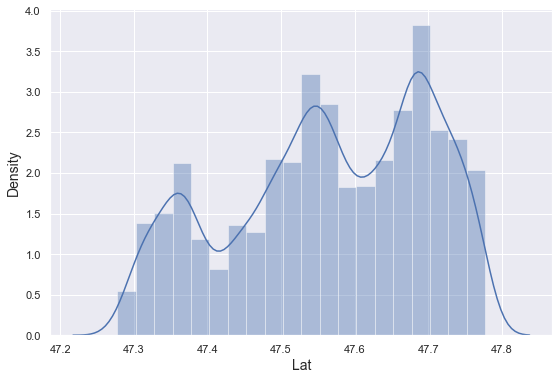

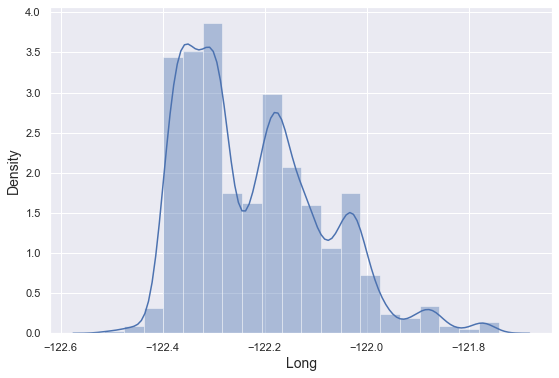

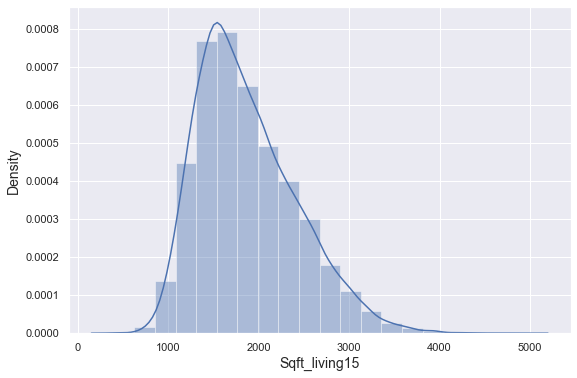

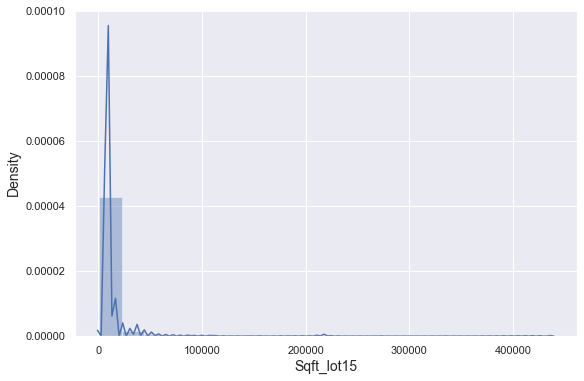

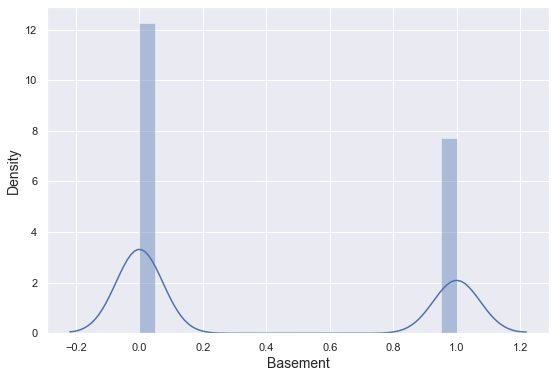

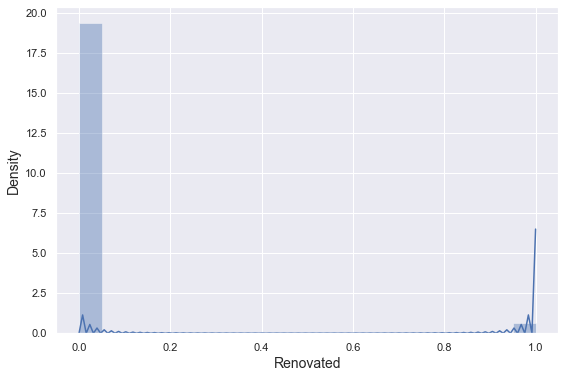

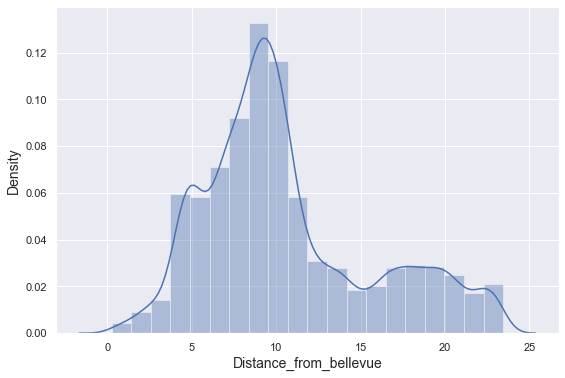

In [23]:
## For loop to create a density plot for each column
for i, col in enumerate(kc_cleaned.columns):
    sns.set_style('darkgrid')
    plt.figure(i, figsize=(9,6))
    sns.distplot(kc_cleaned[col], bins=20, hist=True)
    plt.xlabel(f'{col.capitalize()}', fontsize=14)
    plt.ylabel('Density', fontsize=14)

**Key Takeaways for density plots: Continous Variables**
- No variable is "perfectly" normal, but some do tend to follow an overall normal pattern, i.e, 'price', 'sqft_living', 'sqft_living15'.
- The target variable **'Price'** is moderately skewed to the right.
- **'Sqft_living' and 'Sqft_living15** are more normally distributed than the other features, this can be due to a high amount of variance in other features.
- The rest of the features are worse of in terms of normal distribution.

## Multicollinearity
Before we go any further with building our Model, we have to check for *Multicollinearity* between **Predictor** variables and deal with highly correlated predictors.
> We can do this with a **Correlation Matix**. A **Correlation Matrix** is a table that shows the correlation coefficients between variables. There can be a negative or positive linear relationship between variables. THerefore, we will be using *-0.75* and *0.75* as the cut-offs for high correlation between predictors.

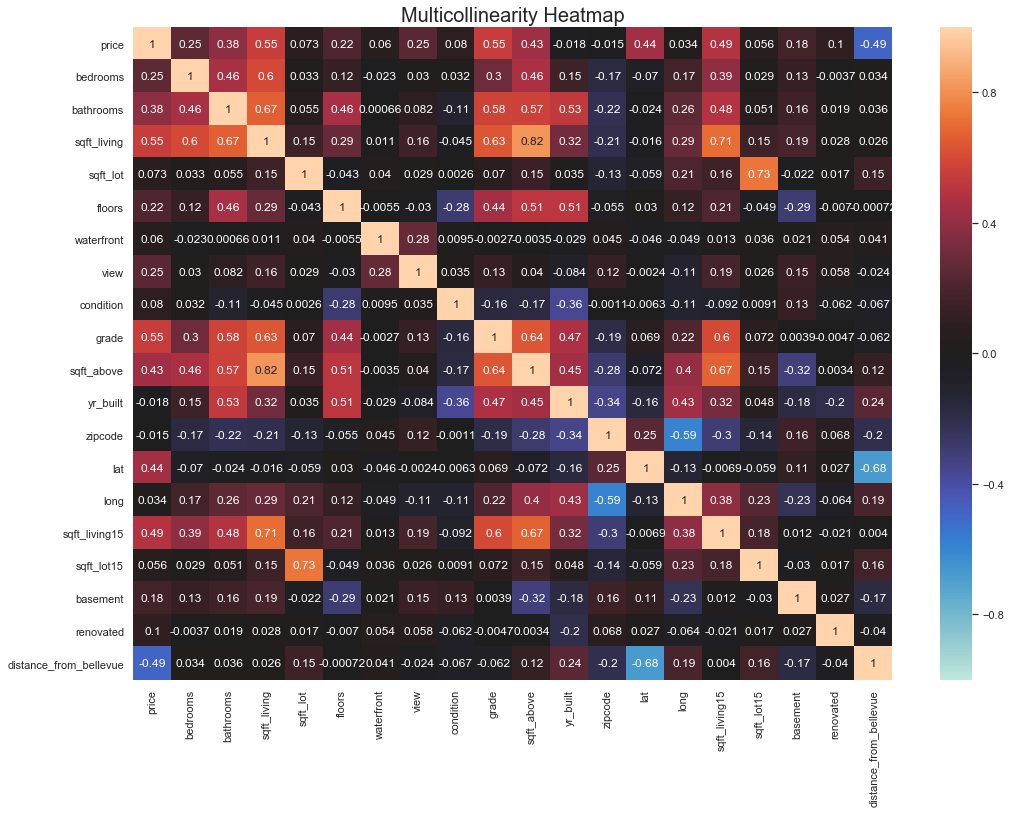

In [24]:
# Calculate correlation matrix
corr = kc_cleaned.corr()
# Plot the heatmap
plt.figure(figsize=(17,12))
ax = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Multicollinearity Heatmap', fontsize=20)
plt.show()

At first glance it's hard to spot correletions below -0.75 and above 0.75. After careful examination we can see that 'sqft_living' and 'sqft_above' have a correlation of 0.8.

In [25]:
# Just to be sure we're not overlooking anything let's go ahead and print out any other correlations
# Create dataframe that saves all values to absolute values of correlation matrix
df = kc_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))  # zip the variable name columns in a new column
df.set_index(['pairs'], inplace = True)  # set index to pairs
df.drop(columns=['level_1', 'level_0'], inplace = True)  # drop level columns
df.columns = ['cc']  # rename correlation column as cc rather than 0
df.drop_duplicates(inplace=True) # drop duplicates.

# Filter with correlation threshold
df[(df.cc > 0.75) & (df.cc < 1) | (df.cc < -0.75) & (df.cc > -1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.81556


> Now that we're sure that 'sqft_living' and 'sqft_above' are correlated with one another. We can drop the column that is least correlated to the target variable 'Price' in each group.

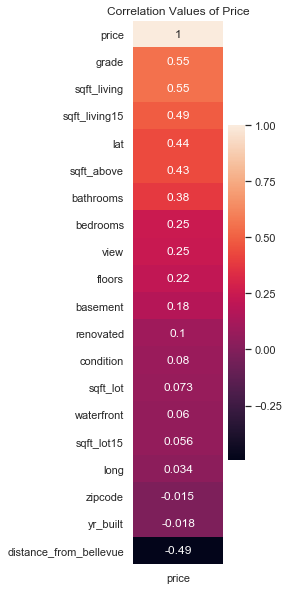

In [26]:
# Create a heatmap that just show the correlation between Target variable and all the predictors
corr = kc_cleaned.corr()
corr_price = pd.DataFrame(corr['price'])
corr_price.sort_values('price', ascending=False, inplace=True)
# Plot heatmap
plt.figure(figsize=(2,10))
ax = sns.heatmap(corr_price, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Values of Price')
plt.show()

> 'sqft_living' and 'sqft_above' are in the top 5 of highly correlated predictors with 'price' but in order to create an accurate prediction model we would have to get rid of one. 

In [27]:
# Drop 'sqft_above' from dataframe and view change
kc_cleaned.drop(['sqft_above'], axis=1, inplace=True)
kc_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated,distance_from_bellevue
0,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1955,98178,47.5112,-122.257,1340,5650,0,0,7.622786
1,538000.0,3,2.5,2570,7242,2.0,0.0,0.0,3,7,1951,98125,47.7210,-122.319,1690,7639,1,1,9.041882
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,1933,98028,47.7379,-122.233,2720,8062,0,0,8.561145
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1965,98136,47.5208,-122.393,1360,5000,1,0,10.979730
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1987,98074,47.6168,-122.045,1800,7503,0,0,7.402273


## Categorical Variables: Dummy Variables
So far we've been focusing mainly on our continious predictors. Let's take a look at out categorical predictors and prepared them for regression. 

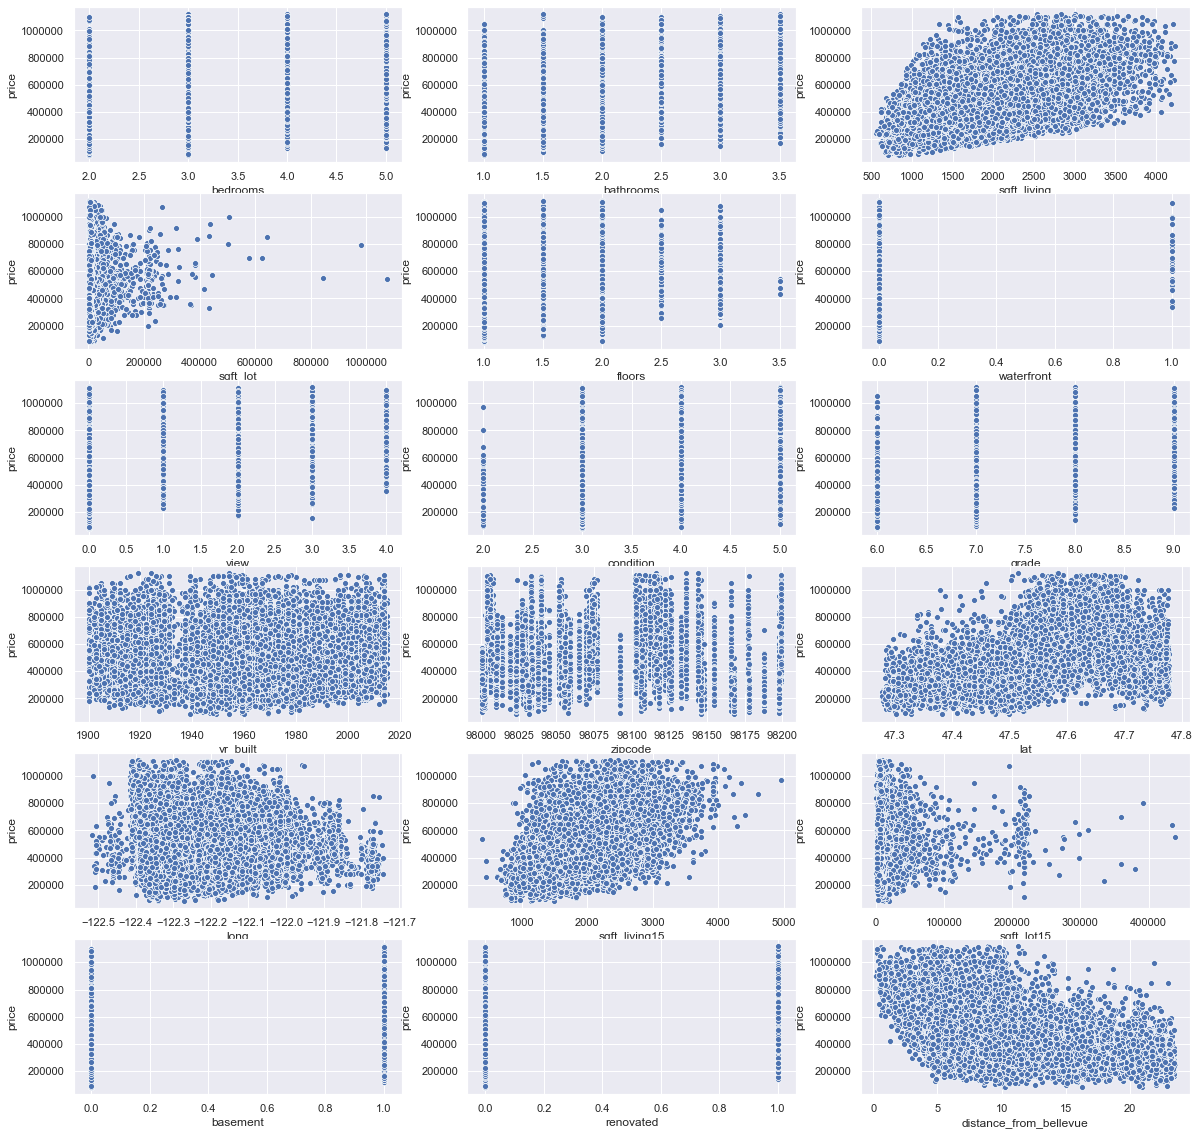

In [28]:
# Scatter plot plot of all predictors with y='price'
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

# Use Seaborn to create Scatterplots of all predictors
sns.scatterplot(ax=axes[0, 0], data=kc_cleaned, x='bedrooms', y='price')
sns.scatterplot(ax=axes[0, 1], data=kc_cleaned, x='bathrooms', y='price')
sns.scatterplot(ax=axes[0, 2], data=kc_cleaned, x='sqft_living', y='price')
sns.scatterplot(ax=axes[1, 0], data=kc_cleaned, x='sqft_lot', y='price')
sns.scatterplot(ax=axes[1, 1], data=kc_cleaned, x='floors', y='price')
sns.scatterplot(ax=axes[1, 2], data=kc_cleaned, x='waterfront', y='price')
sns.scatterplot(ax=axes[2, 0], data=kc_cleaned, x='view', y='price')
sns.scatterplot(ax=axes[2, 1], data=kc_cleaned, x='condition', y='price')
sns.scatterplot(ax=axes[2, 2], data=kc_cleaned, x='grade', y='price')
sns.scatterplot(ax=axes[3, 0], data=kc_cleaned, x='yr_built', y='price')
sns.scatterplot(ax=axes[3, 1], data=kc_cleaned, x='zipcode', y='price')
sns.scatterplot(ax=axes[3, 2], data=kc_cleaned, x='lat', y='price')
sns.scatterplot(ax=axes[4, 0], data=kc_cleaned, x='long', y='price')
sns.scatterplot(ax=axes[4, 1], data=kc_cleaned, x='sqft_living15', y='price')
sns.scatterplot(ax=axes[4, 2], data=kc_cleaned, x='sqft_lot15', y='price')
sns.scatterplot(ax=axes[5, 0], data=kc_cleaned, x='basement', y='price')
sns.scatterplot(ax=axes[5, 1], data=kc_cleaned, x='renovated', y='price')
sns.scatterplot(ax=axes[5, 2], data=kc_cleaned, x='distance_from_bellevue', y='price')
plt.show()

**Key Takeaway Scatterplot: Categorical Variables**
Our Categorical variables are:
- Bedrooms
- Bathrooms
- Floors
- Waterfront 
- Condition
- Grade
- Basement
- Renovated
- Zipcode
- View

The next step would be to create *Dummy Variables* for the _Categorical_ predictors. There are two types of _Categorical Variables_, **Norminal** and **Ordinal** Variables. **Norminal** variables are variables that have two or more categorical values, but do not have an _intrinsic order_. **Ordinal** variables like norminal variables have two or more categorical variables but unlike norminal, ordinal categories can be ordered or ranked. Therefore, if a column's values are _Ordinal_ we can leave them as is and treat them like _Continuous_ variables. If not, we can go ahead and create _Dummy_ variables.
> One way to tell the difference between a _Norminal_ or _Ordinal_ variable would be to create a boxplot of the _Categorical_ variables against the _Target_ variable which in this case is 'Price'. A **Linear** relationship between these two columns tell us that we are dealing with an _Ordinal_ variable. If there is not clear **Linear** relationship, we are dealing with a _Norminal_ variable.

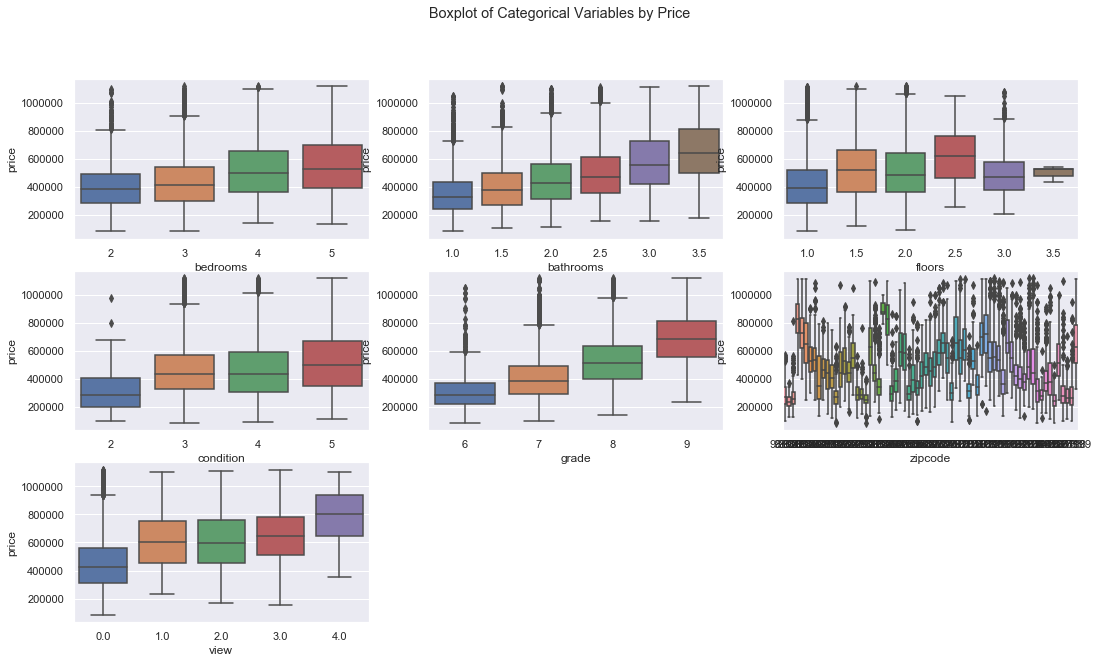

In [29]:
# Create a boxplot of the known categorical variables and the target variables to determine if Norminal or Ordinal
# We don't have to create dummy variables for 'Waterfront', 'Basement', or 'Renovated' so we can exclude them 
# Create new dataframe for select columns
cat_col = kc_cleaned[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'price', 'zipcode', 'view']]

# Write a for loop to create a boxplot of individual columns plotted against target variable 'Price'
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

fig.suptitle('Boxplot of Categorical Variables by Price')

sns.boxplot(ax=axes[0, 0], data=cat_col, x='bedrooms', y='price')
sns.boxplot(ax=axes[0, 1], data=cat_col, x='bathrooms', y='price')
sns.boxplot(ax=axes[0, 2], data=cat_col, x='floors', y='price')
sns.boxplot(ax=axes[1, 0], data=cat_col, x='condition', y='price')
sns.boxplot(ax=axes[1, 1], data=cat_col, x='grade', y='price')
sns.boxplot(ax=axes[1, 2], data=cat_col, x='zipcode', y='price')
sns.boxplot(ax=axes[2, 0], data=cat_col, x='view', y='price')
# Remove unused plots
axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)
plt.show()

> Based on these plots we can see that 'floors' and 'zipcode' are _Norminal_ variables so we can create _dummy_ variables for these columns using **One_Hot Encoding**.

In [30]:
# Create dummies with one-hot encoding
floor_dummies = pd.get_dummies(kc_cleaned['floors'], prefix='floor', drop_first=True)
floor_dummies.columns = floor_dummies.columns.str.replace('.', '_')
floor_dummies.head()

,floor_1_5,floor_2_0,floor_2_5,floor_3_0,floor_3_5
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [31]:
# Create dummies for zipcodes
zip_dummies = pd.get_dummies(kc_cleaned['zipcode'], prefix='zip')
zip_dummies.drop(columns= 'zip_98103')
zip_dummies.head()

,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop the 'floors' and 'zipcode' columns from dataset and replace it with the new dummy columns
kc_cleaned.drop(['floors', 'zipcode'], axis=1, inplace = True)
kc_cleaned = pd.concat([kc_cleaned, floor_dummies, zip_dummies], axis=1)

In [33]:
# View dataset to confirm changes
kc_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.0,1180,5650,0.0,0.0,3,7,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.5,2570,7242,0.0,0.0,3,7,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.0,770,10000,0.0,0.0,3,6,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.0,1960,5000,0.0,0.0,5,7,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.0,1680,8080,0.0,0.0,3,8,1987,...,0,0,0,0,0,0,0,0,0,0


## EDA Questions
Awesome! Now before moving to working on *Regression* let's answer a couple of questions. 

### Question 1: How does location affect price?

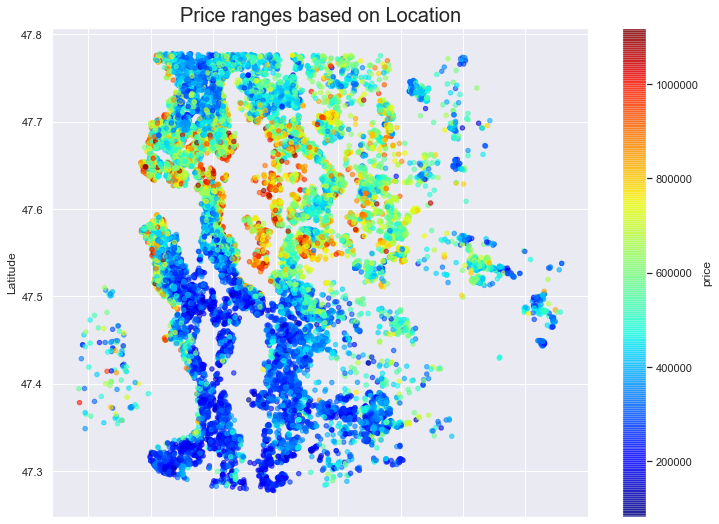

In [34]:
# Scatter plot with lat,long, and price
ax = kc_cleaned.plot.scatter(x = 'long', y ='lat',c = 'price',cmap = 'jet',
                     alpha = 0.6, figsize = (12,9), grid = True)
ax.set_ylabel('Latitude')
plt.title('Price ranges based on Location', fontsize=20)
plt.show()

> It's clear to see that houses north of this graph cost more and that could be for a number of reasons. We'll explore this further later.

### Question 2: Do renovated houses cost more on average?

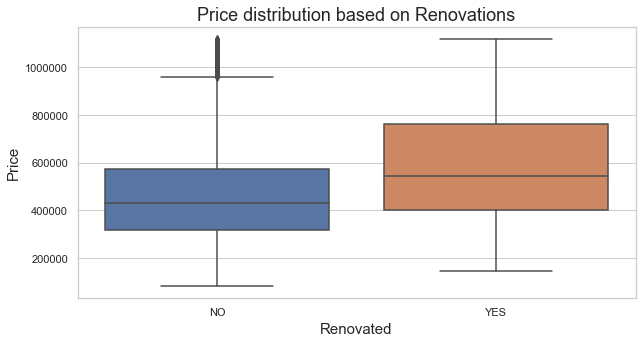

In [35]:
# Plot boxplot to view distribution for renovations
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.boxplot(x='renovated', y='price', data=kc_cleaned)
plt.xticks([0, 1], ['NO', 'YES'])
plt.xlabel('Renovated', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Price distribution based on Renovations',fontsize=18)
plt.show()

> It's safe to say house renovations definately affect house prices. As we saw earlier *Renovated* is only **10%** correlated to *Price* but renovations affects *Grade* which is over **50%** correlated with our target variable.

### Question 3: What is the difference in 'Price' and 'Grade' of 'Renovated' houses?

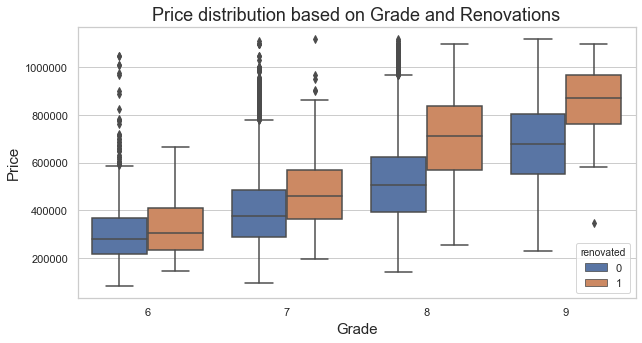

In [36]:
# Plot boxplot to visualize answer
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.boxplot(x='grade', y='price', hue='renovated', data=kc_cleaned)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Price distribution based on Grade and Renovations',fontsize=18)
plt.show()

> Renovations have impacts on Grade which in turn increases house Prices.

### Question 3: What is the relationship between house Prices and distance from Bellevue?

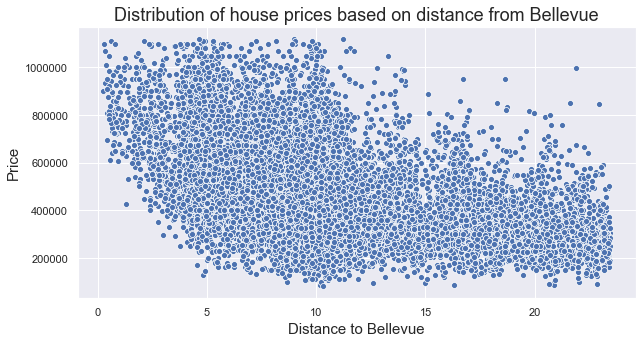

In [37]:
# Plot scatterplot with 'price' and 'distance_from_bellevue'
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.scatterplot(data=kc_cleaned, x='distance_from_bellevue', y='price')
plt.xlabel('Distance to Bellevue', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Distribution of house prices based on distance from Bellevue' ,fontsize=18)
plt.show()

> The relationship between the **Price** of a house and the **distance** from a major city as as you would expect. The closer you get to the city the more ***expensive*** the houses are.

In [38]:
# Save new dataset as CSV for Regression Notebook
kc_cleaned.to_csv('Data/kc_reg.csv')